<a href="https://colab.research.google.com/github/Tar-ive/Impact-of-AI-in-Education-Process/blob/main/Analysis_AI_Students.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   ID  Q1.AI_knowledge                                      Q2.AI_sources  \
0   1                8  Internet;Books/Scientific papers (physical/onl...   
1   2                7                              Internet;Social media   
2   3                5  Internet;Books/Scientific papers (physical/onl...   
3   4                5                              Internet;Social media   
4   5                4                                           Internet   

   Q2#1.Internet  Q2#2.Books/Papers  Q2#3.Social_media  Q2#4.Discussions  \
0              1                  1                  0                 0   
1              1                  0                  1                 0   
2              1                  1                  0                 0   
3              1                  0                  1                 0   
4              1                  0                  0                 0   

   Q2#5.NotInformed  Q3#1.AI_dehumanization  Q3#2.Job_replacement  ...  \
0     

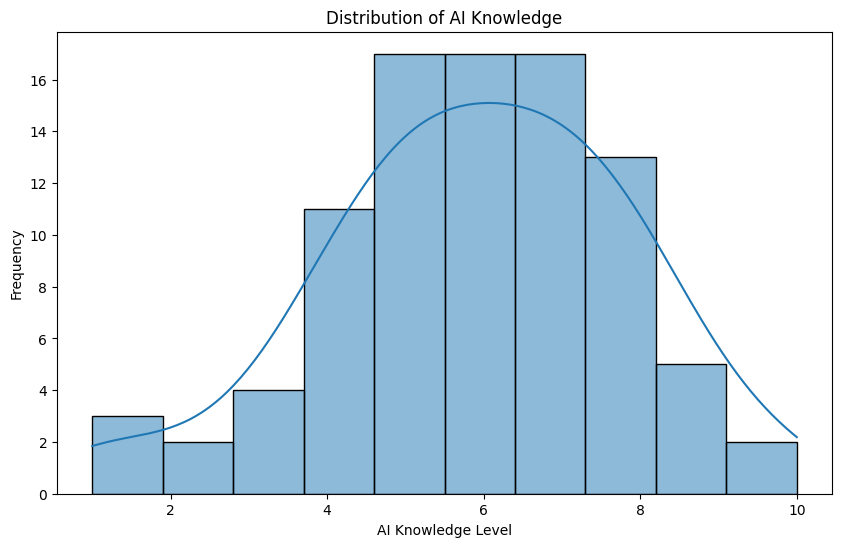

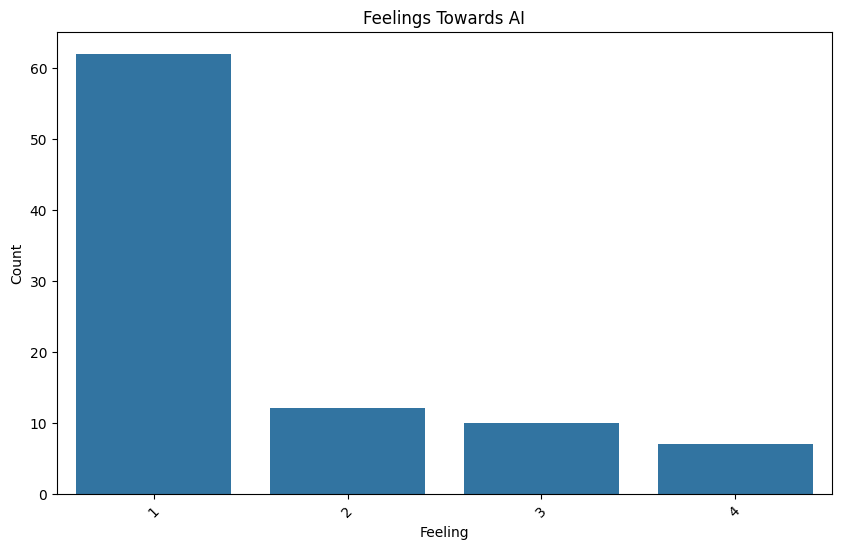

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('/content/Survey_AI.csv')

# Display the first few rows to understand the structure
print(df.head())

print(df[['Q1.AI_knowledge', 'Q7.Utility_grade', 'Q16.GPA']].describe())

# Value Counts for categorical columns
print("\nFeelings towards AI (Q5.Feelings):")
print(df['Q5.Feelings'].value_counts())

# Visualizations
# Histogram for Q1.AI_knowledge
plt.figure(figsize=(10, 6))
sns.histplot(df['Q1.AI_knowledge'], kde=True, bins=10)
plt.title('Distribution of AI Knowledge')
plt.xlabel('AI Knowledge Level')
plt.ylabel('Frequency')
plt.show()

# Bar plot for Q5.Feelings
plt.figure(figsize=(10, 6))
sns.countplot(x='Q5.Feelings', data=df)
plt.title('Feelings Towards AI')
plt.xlabel('Feeling')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


In [2]:
df.columns

Index(['ID', 'Q1.AI_knowledge', 'Q2.AI_sources', 'Q2#1.Internet',
       'Q2#2.Books/Papers', 'Q2#3.Social_media', 'Q2#4.Discussions',
       'Q2#5.NotInformed', 'Q3#1.AI_dehumanization', 'Q3#2.Job_replacement',
       'Q3#3.Problem_solving', 'Q3#4.AI_rulling_society', 'Q4#1.AI_costly',
       'Q4#2.Economic_crisis', 'Q4#3.Economic_growth', 'Q4#4.Job_loss',
       'Q5.Feelings', 'Q6.Domains', 'Q6#1.Education', 'Q6#2.Medicine',
       'Q6#3.Agriculture', 'Q6#4.Constructions', 'Q6#5.Marketing',
       'Q6#6.Administration', 'Q6#7.Art', 'Q7.Utility_grade',
       'Q8.Advantage_teaching', 'Q9.Advantage_learning',
       'Q10.Advantage_evaluation ', 'Q11.Disadvantage_educational_process',
       'Q12.Gender', 'Q13.Year_of_study', 'Q14.Major', 'Q15.Passed_exams',
       'Q16.GPA'],
      dtype='object')

<ipython-input-3-fb5db679ccf8>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


                                            ID  Q1.AI_knowledge  \
ID                                    1.000000        -0.086906   
Q1.AI_knowledge                      -0.086906         1.000000   
Q2#1.Internet                        -0.167440         0.223136   
Q2#2.Books/Papers                    -0.065711         0.338465   
Q2#3.Social_media                     0.054787         0.288356   
Q2#4.Discussions                     -0.205842         0.064524   
Q2#5.NotInformed                      0.219146        -0.417508   
Q3#1.AI_dehumanization               -0.037104        -0.134600   
Q3#2.Job_replacement                  0.086693        -0.067033   
Q3#3.Problem_solving                 -0.205877         0.242541   
Q3#4.AI_rulling_society               0.259424        -0.101119   
Q4#1.AI_costly                       -0.117883        -0.149651   
Q4#2.Economic_crisis                  0.136996        -0.088189   
Q4#3.Economic_growth                  0.009165         0.09879

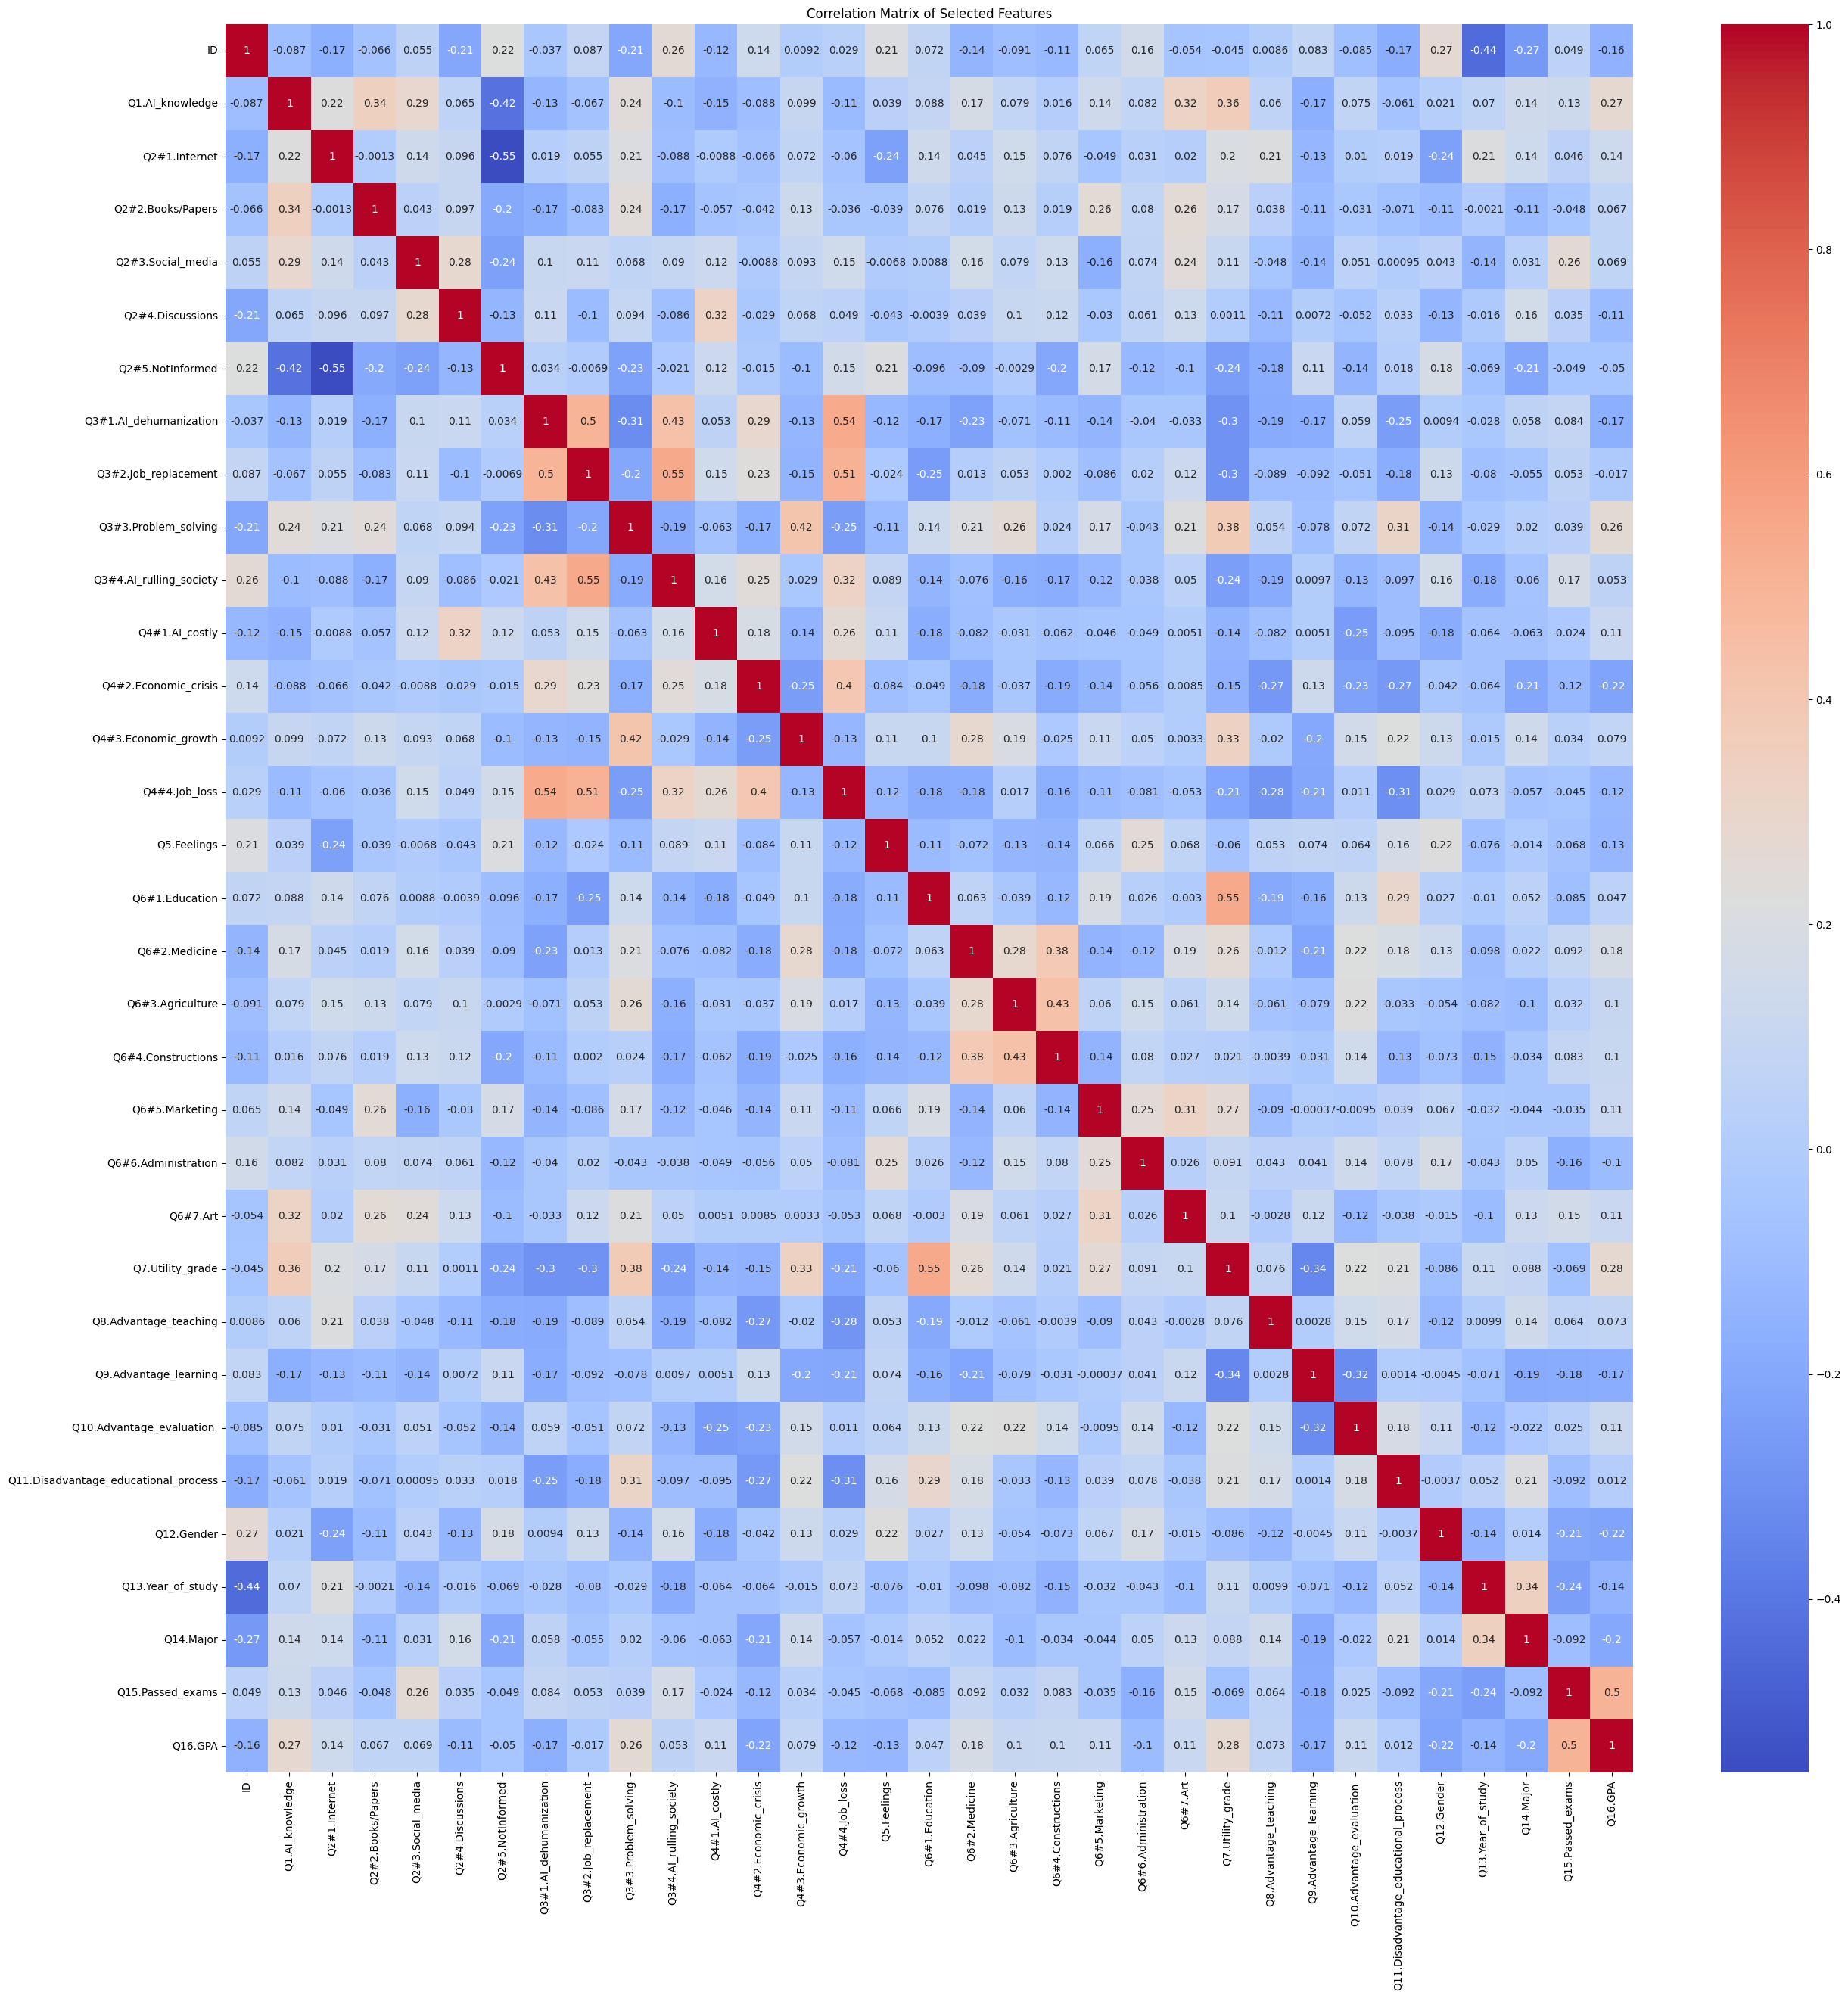

In [3]:
# Assuming necessary columns have been encoded appropriately
correlation_matrix = df.corr()

# Display the correlation matrix
print(correlation_matrix)

# Visualize the correlation matrix
plt.figure(figsize=(30, 30))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Selected Features')
plt.show()

In [4]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

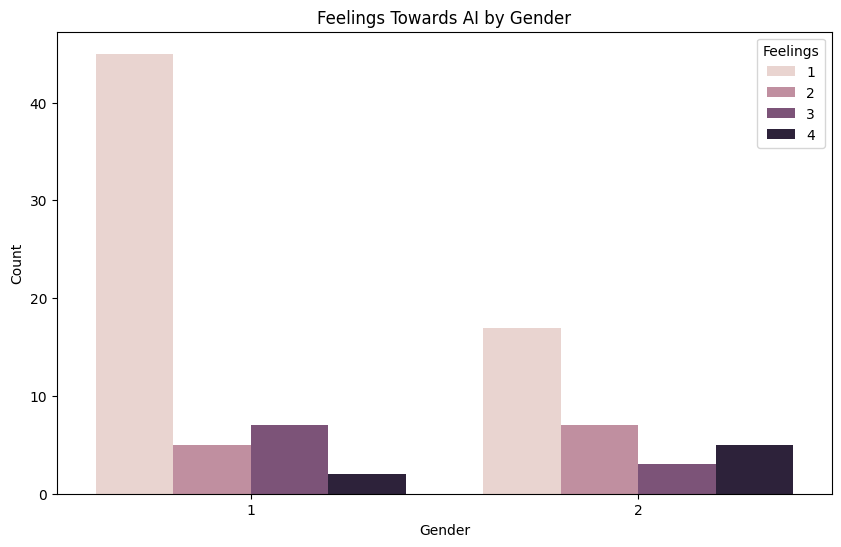

In [5]:
# Gender and feelings towards AI
plt.figure(figsize=(10, 6))
sns.countplot(x='Q12.Gender', hue='Q5.Feelings', data=df)
plt.title('Feelings Towards AI by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Feelings')
plt.show()


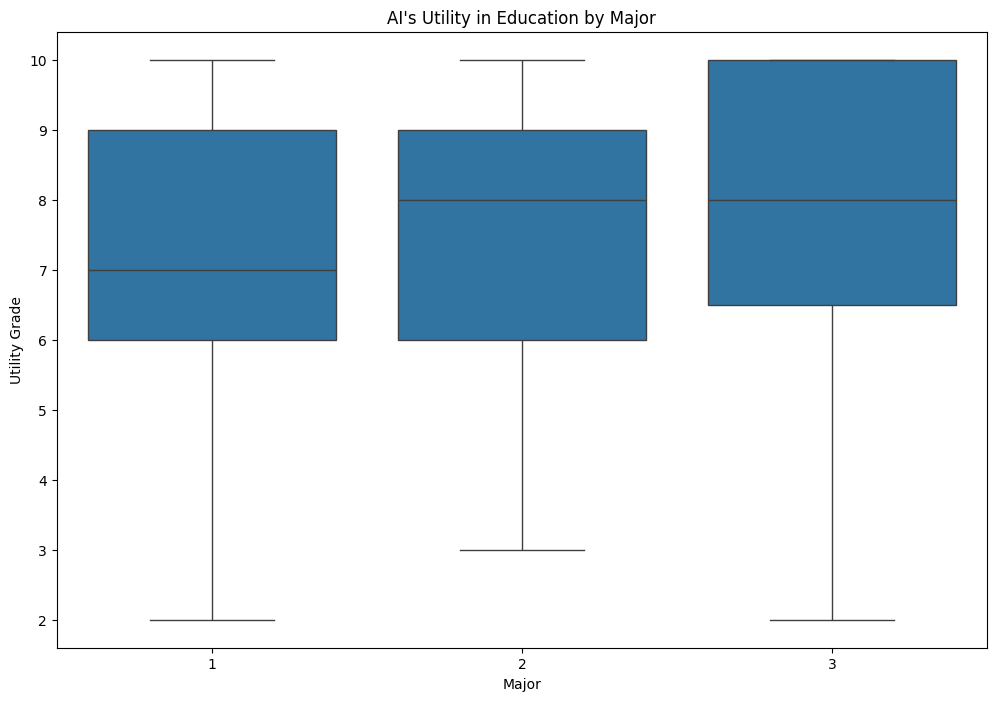

In [6]:
# Major and belief in AI's utility in education
plt.figure(figsize=(12, 8))
sns.boxplot(x='Q14.Major', y='Q7.Utility_grade', data=df)
plt.title("AI's Utility in Education by Major")
plt.xlabel('Major')
plt.ylabel('Utility Grade')
plt.show()


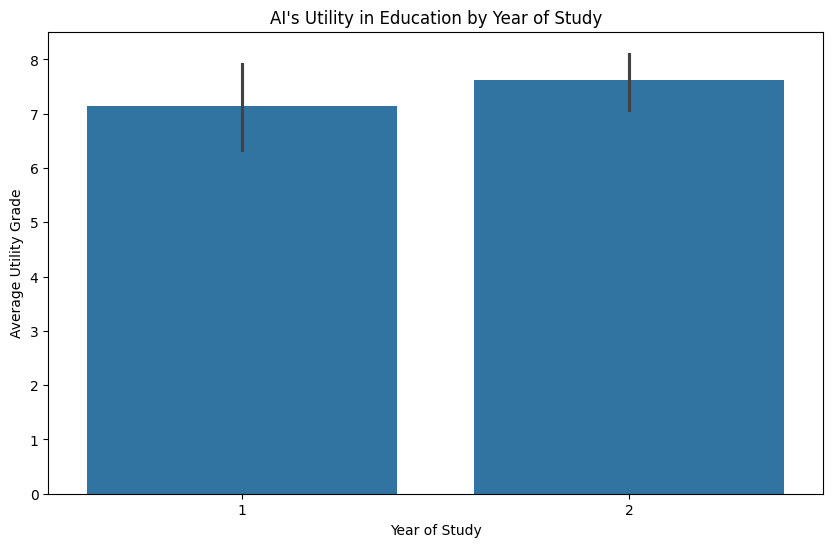

In [7]:
# Year of study and AI's utility in education
plt.figure(figsize=(10, 6))
sns.barplot(x='Q13.Year_of_study', y='Q7.Utility_grade', data=df)
plt.title("AI's Utility in Education by Year of Study")
plt.xlabel('Year of Study')
plt.ylabel('Average Utility Grade')
plt.show()


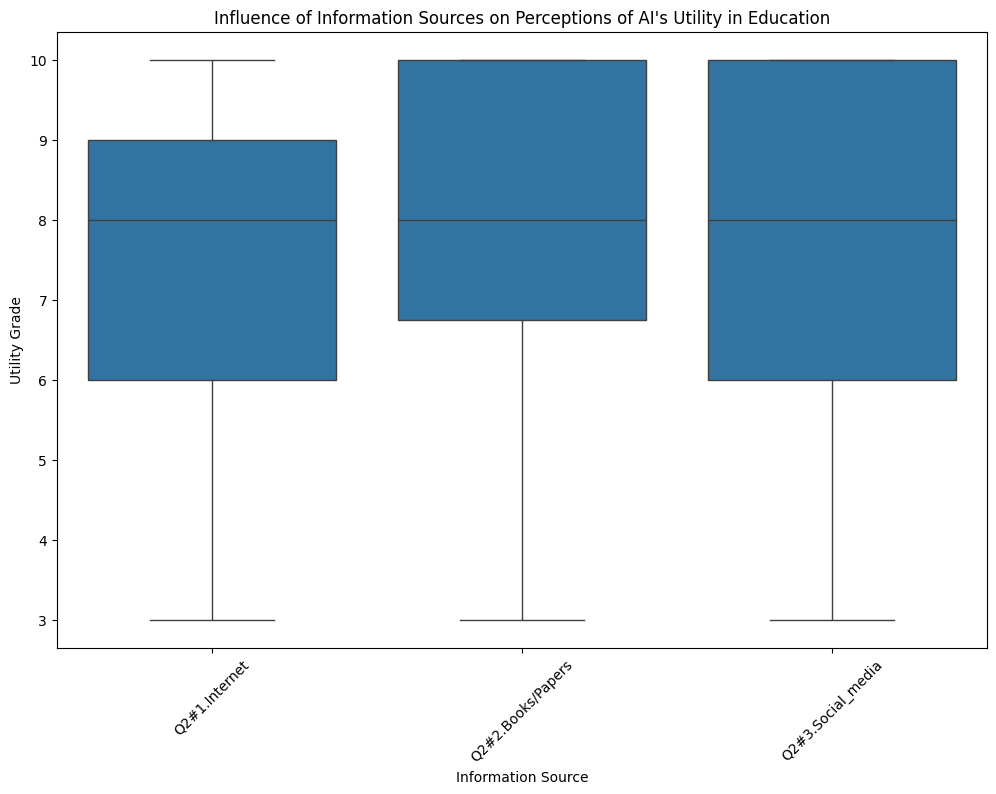

In [8]:
# Creating a new dataframe to analyze information sources and AI utility grade
info_sources = df[['Q2#1.Internet', 'Q2#2.Books/Papers', 'Q2#3.Social_media', 'Q7.Utility_grade']].melt(id_vars=['Q7.Utility_grade'], var_name='Source', value_name='Used')
info_sources = info_sources[info_sources['Used'] == 1]  # Filter only used sources

plt.figure(figsize=(12, 8))
sns.boxplot(x='Source', y='Q7.Utility_grade', data=info_sources)
plt.title("Influence of Information Sources on Perceptions of AI's Utility in Education")
plt.xlabel('Information Source')
plt.ylabel('Utility Grade')
plt.xticks(rotation=45)
plt.show()


In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

Mean Squared Error: 3.015668614821772
R^2 Score: -0.4065327777140306


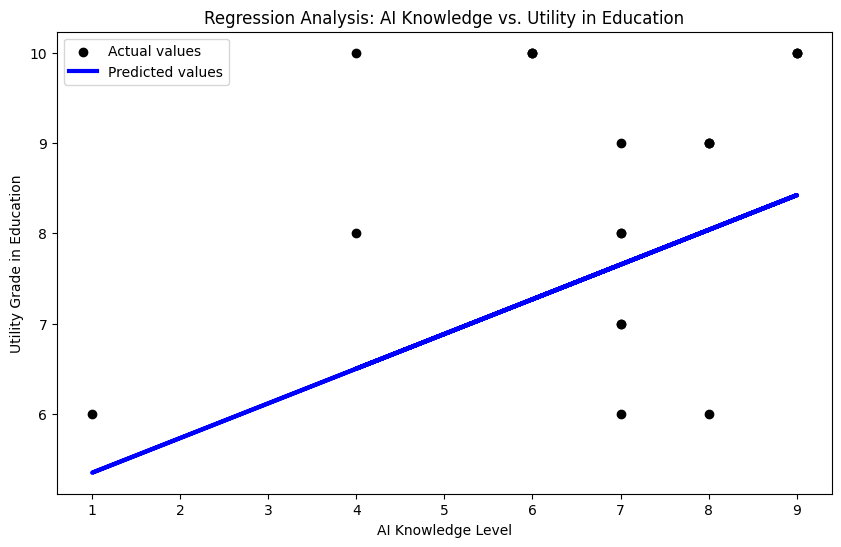

In [10]:
X = df[['Q1.AI_knowledge']]  # Predictor variable
y = df['Q7.Utility_grade']  # Response variable

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating a linear regression model
model = LinearRegression()

# Training the model
model.fit(X_train, y_train)

# Predicting on the test set
y_pred = model.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

# Plotting the regression
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='black', label='Actual values')
plt.plot(X_test, y_pred, color='blue', linewidth=3, label='Predicted values')
plt.title('Regression Analysis: AI Knowledge vs. Utility in Education')
plt.xlabel('AI Knowledge Level')
plt.ylabel('Utility Grade in Education')
plt.legend()
plt.show()

In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler

In [12]:
X = df[['Q1.AI_knowledge', 'Q7.Utility_grade', 'Q12.Gender', 'Q13.Year_of_study']]  # Predictor variables
y = df['Q5.Feelings']  # Response variable

# Encoding categorical variables if not already encoded
# This step is crucial for models to understand categorical data

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Creating the model
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Training the model
clf.fit(X_train_scaled, y_train)

# Predicting on the test set
y_pred = clf.predict(X_test_scaled)

# Evaluating the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.5789473684210527
Classification Report:
               precision    recall  f1-score   support

           1       0.65      0.85      0.73        13
           2       0.00      0.00      0.00         3
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         2

    accuracy                           0.58        19
   macro avg       0.16      0.21      0.18        19
weighted avg       0.44      0.58      0.50        19



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [13]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder


In [14]:
label_encoders = {}
for column in ['Q12.Gender', 'Q14.Major', 'Q13.Year_of_study']:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

# Predictor variables
X = df[['Q2#1.Internet', 'Q2#2.Books/Papers', 'Q2#3.Social_media', 'Q12.Gender', 'Q14.Major', 'Q13.Year_of_study']]

# Response variable
y = df['Q4#4.Job_loss'].apply(lambda x: 1 if x in ['Partially Agree', 'Fully Agree'] else 0)

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the model
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 1.0
Confusion Matrix:
 [[19]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19

    accuracy                           1.00        19
   macro avg       1.00      1.00      1.00        19
weighted avg       1.00      1.00      1.00        19



In [15]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


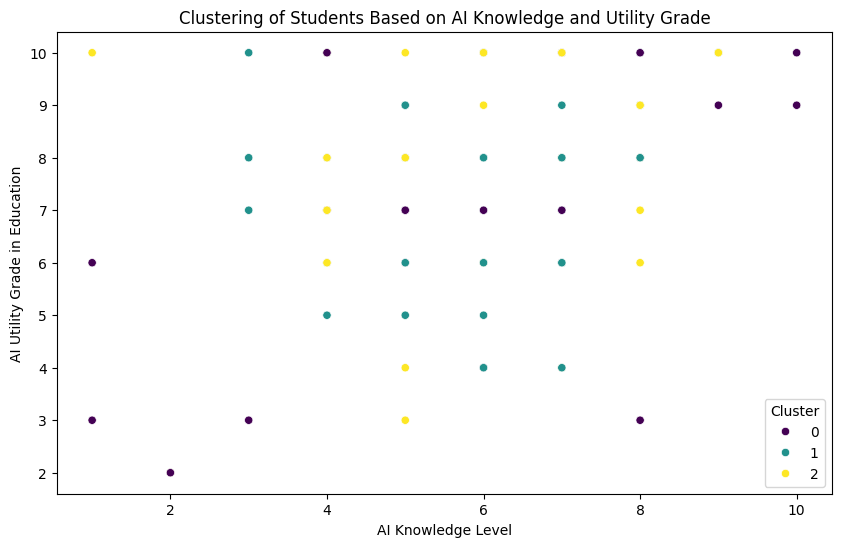

In [16]:
features_for_clustering = df[['Q1.AI_knowledge', 'Q7.Utility_grade', 'Q12.Gender', 'Q14.Major', 'Q13.Year_of_study']]

# Standardizing features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features_for_clustering)

# Running K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(features_scaled)

# Adding cluster information back to the original dataframe
df['Cluster'] = clusters

# Visualizing the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Q1.AI_knowledge', y='Q7.Utility_grade', hue='Cluster', palette='viridis')
plt.title('Clustering of Students Based on AI Knowledge and Utility Grade')
plt.xlabel('AI Knowledge Level')
plt.ylabel('AI Utility Grade in Education')
plt.show()

In [17]:
df

,ID,Q1.AI_knowledge,Q2.AI_sources,Q2#1.Internet,Q2#2.Books/Papers,Q2#3.Social_media,Q2#4.Discussions,Q2#5.NotInformed,Q3#1.AI_dehumanization,Q3#2.Job_replacement,...,Q8.Advantage_teaching,Q9.Advantage_learning,Q10.Advantage_evaluation,Q11.Disadvantage_educational_process,Q12.Gender,Q13.Year_of_study,Q14.Major,Q15.Passed_exams,Q16.GPA,Cluster
0,1,8,Internet;Books/Scientific papers (physical/onl...,1,1,0,0,0,1,2,...,3,1,2,3,0,1,1,1,9.2,1
1,2,7,Internet;Social media,1,0,1,0,0,2,3,...,2,2,1,2,1,1,1,1,7.7,0
2,3,5,Internet;Books/Scientific papers (physical/onl...,1,1,0,0,0,2,1,...,3,3,3,4,1,1,1,0,7.2,0
3,4,5,Internet;Social media,1,0,1,0,0,4,4,...,1,2,2,3,0,1,1,1,8.2,1
4,5,4,Internet,1,0,0,0,0,1,2,...,3,2,3,4,0,1,1,1,7.7,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86,87,8,Internet,1,0,0,0,0,1,1,...,2,2,1,1,1,0,0,1,7.2,2
87,88,6,Social media,0,0,1,0,0,2,2,...,3,1,3,2,1,0,2,1,8.7,0
88,89,9,Books/Scientific papers (physical/online format),0,1,0,0,0,1,1,...,1,2,3,1,1,0,0,0,6.2,2
89,90,2,I don't inform myself about AI,0,0,0,0,1,2,4,...,2,3,1,2,1,0,0,1,8.7,2


In [18]:
features = ['Q1.AI_knowledge', 'Q3#2.Job_replacement', 'Q3#3.Problem_solving',
            'Q4#4.Job_loss', 'Q7.Utility_grade']


In [19]:
X = df[features]


In [20]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

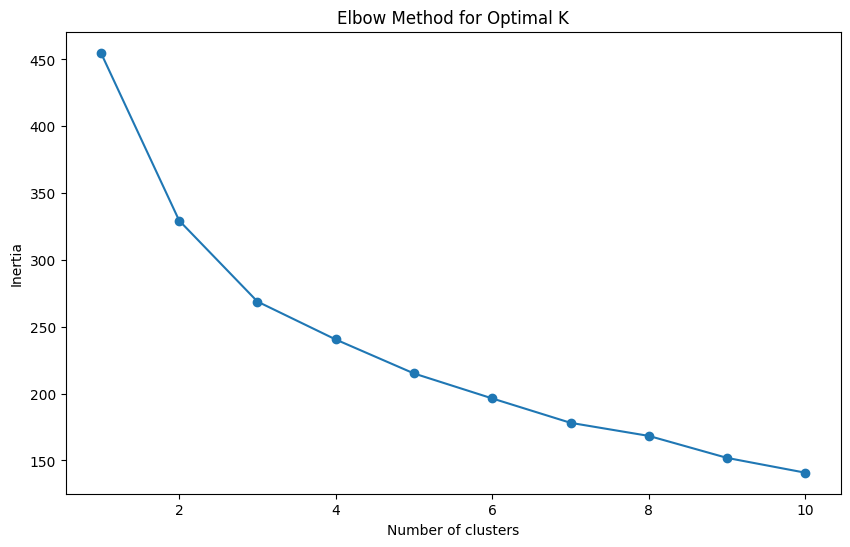

In [21]:
import matplotlib.pyplot as plt

# Determining the optimal number of clusters
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [22]:
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Adding the cluster labels to your dataframe
df['Cluster'] = clusters

# Analyzing the clusters
print(df.groupby('Cluster').mean())

                ID  Q1.AI_knowledge  Q2#1.Internet  Q2#2.Books/Papers  \
Cluster                                                                 
0        44.325581         6.604651       0.837209           0.395349   
1        61.416667         4.416667       0.500000           0.166667   
2        42.861111         5.583333       0.888889           0.361111   

         Q2#3.Social_media  Q2#4.Discussions  Q2#5.NotInformed  \
Cluster                                                          
0                 0.395349          0.186047          0.023256   
1                 0.333333          0.166667          0.333333   
2                 0.527778          0.222222          0.027778   

         Q3#1.AI_dehumanization  Q3#2.Job_replacement  Q3#3.Problem_solving  \
Cluster                                                                       
0                      1.837209              2.372093              4.511628   
1                      3.250000              3.833333             

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-22-9401fd9ab750>:8: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print(df.groupby('Cluster').mean())


<ipython-input-23-f976fc0e76f8>:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=df['Cluster'], y=df[feature], ax=axes[i], ci=None)
<ipython-input-23-f976fc0e76f8>:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[i].set_xticklabels(cluster_names, rotation=45, ha="right")
<ipython-input-23-f976fc0e76f8>:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=df['Cluster'], y=df[feature], ax=axes[i], ci=None)
<ipython-input-23-f976fc0e76f8>:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[i].set_xticklabels(cluster_names, rotation=45, ha="right")
<ipython-input-23-f976fc0e76f8>:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=df['Cluster'], y=df[feature], ax=axes[i], ci=None)
<ipython-input-23-f976fc0e76f8>:17: UserWarning: FixedForm

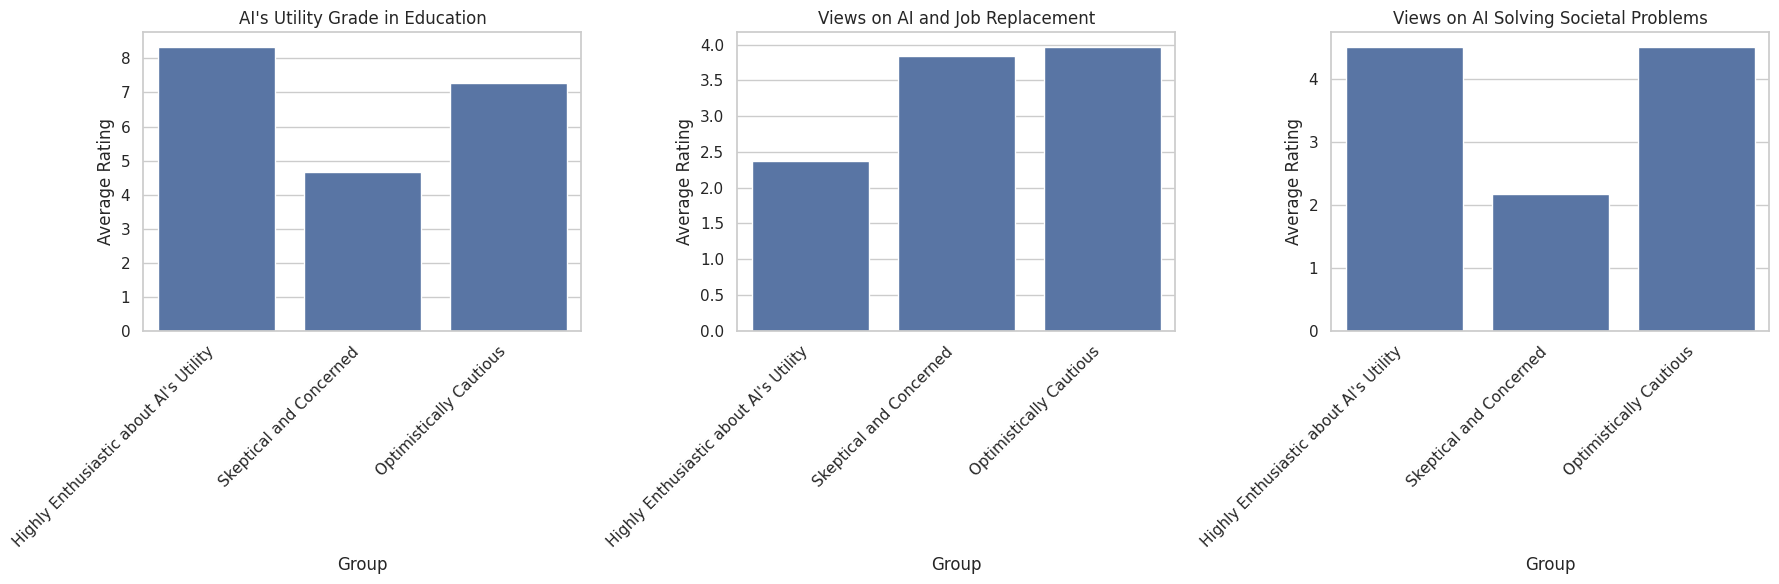

In [23]:
sns.set(style="whitegrid")

# Data for visualization
cluster_names = ["Highly Enthusiastic about AI's Utility", "Skeptical and Concerned", "Optimistically Cautious"]
features_to_visualize = ['Q7.Utility_grade', 'Q3#2.Job_replacement', 'Q3#3.Problem_solving']
features_titles = ["AI's Utility Grade in Education", "Views on AI and Job Replacement", "Views on AI Solving Societal Problems"]

# Create a figure with subplots
fig, axes = plt.subplots(nrows=1, ncols=len(features_to_visualize), figsize=(18, 6))

# Loop through the features and create a bar plot for each
for i, feature in enumerate(features_to_visualize):
    sns.barplot(x=df['Cluster'], y=df[feature], ax=axes[i], ci=None)
    axes[i].set_title(features_titles[i])
    axes[i].set_xlabel('Group')
    axes[i].set_ylabel('Average Rating')
    axes[i].set_xticklabels(cluster_names, rotation=45, ha="right")

plt.tight_layout()
plt.show()

In [24]:
import networkx as nx

In [26]:
sources_columns = ['Q2#1.Internet', 'Q2#2.Books/Papers', 'Q2#3.Social_media', 'Q2#4.Discussions']
domains_columns = ['Q6#1.Education', 'Q6#2.Medicine', 'Q6#3.Agriculture', 'Q6#4.Constructions', 'Q6#5.Marketing', 'Q6#6.Administration', 'Q6#7.Art']


In [27]:
edges = []

In [28]:
for index, row in df.iterrows():
    for source in sources_columns:
        if row[source] == 1:  # Assuming a response of 1 indicates the source was used
            for domain in domains_columns:
                if row[domain] == 1:  # Assuming a response of 1 indicates belief in AI's utility in the domain
                    # Add edge between source and domain
                    edges.append((source, domain))

In [29]:
B = nx.Graph()
B.add_edges_from(edges)

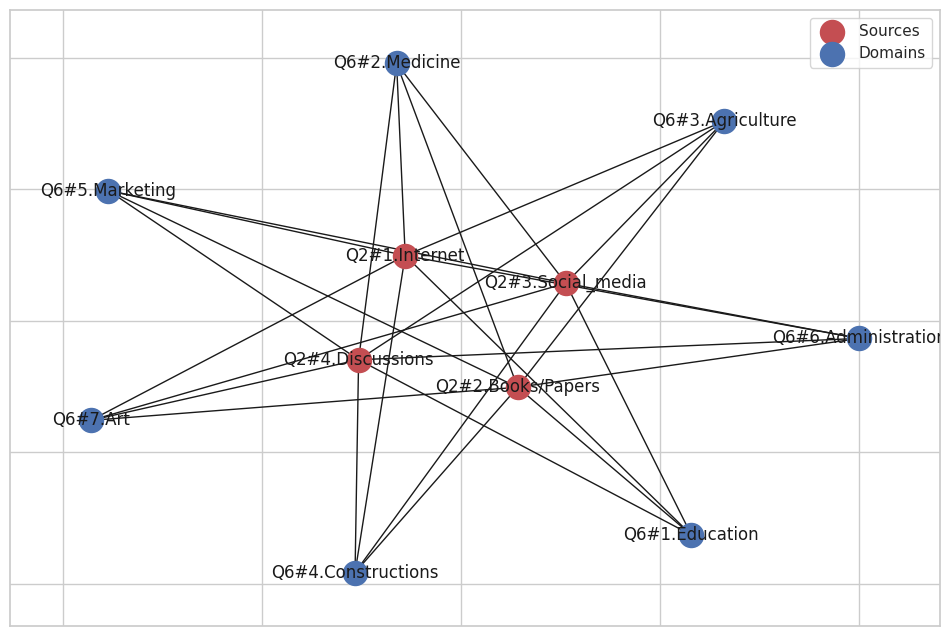

In [30]:
plt.figure(figsize=(12,8))
pos = nx.spring_layout(B)  # Positions for all nodes
nx.draw_networkx_nodes(B, pos, nodelist=sources_columns, node_color='r', label='Sources')
nx.draw_networkx_nodes(B, pos, nodelist=domains_columns, node_color='b', label='Domains')
nx.draw_networkx_edges(B, pos)
nx.draw_networkx_labels(B, pos)
plt.legend()
plt.show()

In [33]:
edges

[('Q2#1.Internet', 'Q6#1.Education'),
 ('Q2#1.Internet', 'Q6#2.Medicine'),
 ('Q2#1.Internet', 'Q6#5.Marketing'),
 ('Q2#2.Books/Papers', 'Q6#1.Education'),
 ('Q2#2.Books/Papers', 'Q6#2.Medicine'),
 ('Q2#2.Books/Papers', 'Q6#5.Marketing'),
 ('Q2#1.Internet', 'Q6#2.Medicine'),
 ('Q2#1.Internet', 'Q6#3.Agriculture'),
 ('Q2#1.Internet', 'Q6#4.Constructions'),
 ('Q2#3.Social_media', 'Q6#2.Medicine'),
 ('Q2#3.Social_media', 'Q6#3.Agriculture'),
 ('Q2#3.Social_media', 'Q6#4.Constructions'),
 ('Q2#1.Internet', 'Q6#1.Education'),
 ('Q2#1.Internet', 'Q6#5.Marketing'),
 ('Q2#1.Internet', 'Q6#6.Administration'),
 ('Q2#2.Books/Papers', 'Q6#1.Education'),
 ('Q2#2.Books/Papers', 'Q6#5.Marketing'),
 ('Q2#2.Books/Papers', 'Q6#6.Administration'),
 ('Q2#1.Internet', 'Q6#1.Education'),
 ('Q2#1.Internet', 'Q6#2.Medicine'),
 ('Q2#3.Social_media', 'Q6#1.Education'),
 ('Q2#3.Social_media', 'Q6#2.Medicine'),
 ('Q2#1.Internet', 'Q6#1.Education'),
 ('Q2#1.Internet', 'Q6#2.Medicine'),
 ('Q2#1.Internet', 'Q6#3.Agri

In [31]:
centrality = nx.degree_centrality(B)
for node, cent in sorted(centrality.items(), key=lambda item: item[1], reverse=True):
    print(f"{node}: {cent:.2f}")

Q2#1.Internet: 0.70
Q2#2.Books/Papers: 0.70
Q2#3.Social_media: 0.70
Q2#4.Discussions: 0.70
Q6#1.Education: 0.40
Q6#2.Medicine: 0.40
Q6#5.Marketing: 0.40
Q6#3.Agriculture: 0.40
Q6#4.Constructions: 0.40
Q6#6.Administration: 0.40
Q6#7.Art: 0.40


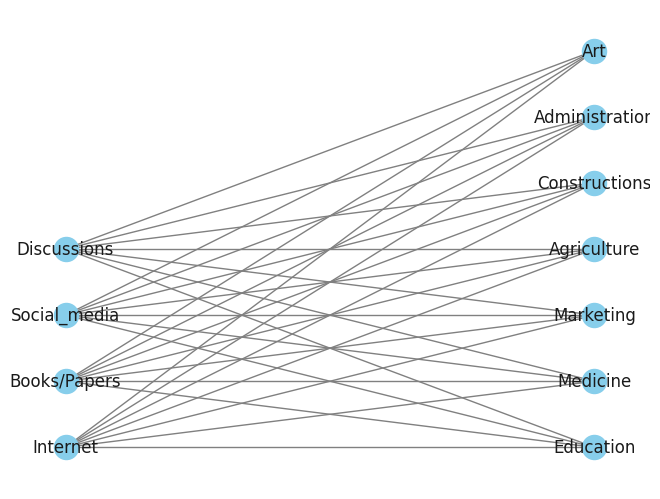

In [35]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph()

# Add nodes for each source and domain
sources = ['Internet', 'Books/Papers', 'Social_media', 'Discussions']
domains = ['Education', 'Medicine', 'Marketing', 'Agriculture', 'Constructions', 'Administration', 'Art']

# Add the source and domain nodes to the graph
G.add_nodes_from(sources, bipartite=0, type='source')
G.add_nodes_from(domains, bipartite=1, type='domain')

# Add edges between sources and domains with weights
for source in sources:
    for domain in domains:
        G.add_edge(source, domain, weight=0.40)  # The weight signifies the connection strength

# Position nodes in two distinct groups
pos = {node: [0, i] for i, node in enumerate(sources)}
pos.update({node: [1, i] for i, node in enumerate(domains)})

# Draw the bipartite network graph
nx.draw(G, pos, with_labels=True, node_color='skyblue', edge_color='grey')

plt.show()

In [36]:
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder